In [16]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import time

In [3]:
train=pd.read_csv('data/train.csv')
train_image=train.iloc[:,1:]
train_image.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_label=train.iloc[:,0]
train_label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [9]:
train_28=train_image.iloc[0].values.reshape(28,28)

ValueError: Single argument to subplot must be a three-digit integer, not False

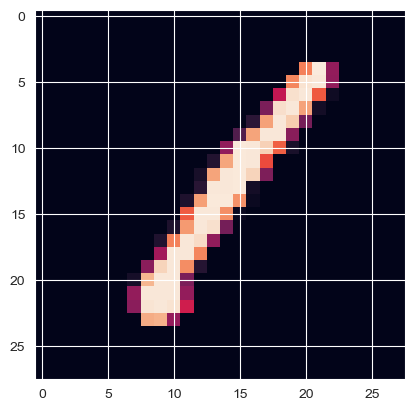

In [11]:
plt.imshow(train_28)
plt.axes(False)
plt.show()

In [13]:
#数据归一化
x_train=train_image.values/255
y_train=train_label.values

In [14]:
#数据集分割
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)

In [18]:
#特征降纬以及寻找最佳维度参数
def to_fit(n, x_train, y_train, x_test, y_test):
    pca=PCA(n_components=n)
    pca.fit(x_train)
    x_train_pca=pca.transform(x_train)
    x_test_pca=pca.transform(x_test)
    s=svm.SVC()
    s.fit(x_train_pca,y_train)
    accuracy=s.score(x_test_pca,y_test)
    return accuracy

In [20]:
ns=np.linspace(0.7,0.9,num=5)
scores=[]
for n in ns:
    s=to_fit(n,x_train,y_train,x_test,y_test)
    scores.append(s)

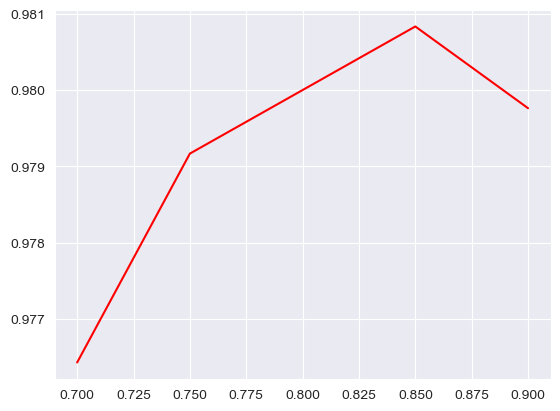

In [21]:
plt.plot(ns,scores,'r')
plt.show()

In [22]:
pca=PCA(n_components=0.85)
pca.fit(x_train)
x=pca.transform(x_train)
x_test=pca.transform(x_test)
s=svm.SVC()
s.fit(x,y_train)
accuracy=s.score(x_test,y_test)

In [24]:
print(accuracy)

0.9808333333333333


In [25]:
arr=s.predict(x_test)
print(arr)
print(y_test)

[7 7 8 ... 1 9 4]
[7 7 8 ... 1 9 4]
